Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 69, 69, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 7, 7, 128)        

C:\Users\Admin\AppData\Local\Temp\ipykernel_23248\3919001585.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
383/383 [==============================] - 118s 304ms/step - loss: 2.0390 - accuracy: 0.3924 - val_loss: 1.0330 - val_accuracy: 0.7408
Epoch 2/10
383/383 [==============================] - 117s 305ms/step - loss: 1.0097 - accuracy: 0.6822 - val_loss: 0.5296 - val_accuracy: 0.8617
Epoch 3/10
383/383 [==============================] - 112s 293ms/step - loss: 0.7131 - accuracy: 0.7757 - val_loss: 0.3467 - val_accuracy: 0.9075
Epoch 4/10
383/383 [==============================] - 120s 312ms/step - loss: 0.5903 - accuracy: 0.8177 - val_loss: 0.2271 - val_accuracy: 0.9413
Epoch 5/10
383/383 [==============================] - 112s 292ms/step - loss: 0.5019 - accuracy: 0.8452 - val_loss: 0.3038 - val_accuracy: 0.9185
Epoch 6/10
383/383 [==============================] - 98s 257ms/step - loss: 0.4409 - accuracy: 0.8650 - val_loss: 0.2272 - val_accuracy: 0.9393
Epoch 7/10
383/383 [==============================] - 99s 259ms/step - loss: 0.4060 - accuracy: 0.8772 - val_loss: 0.1752 - v

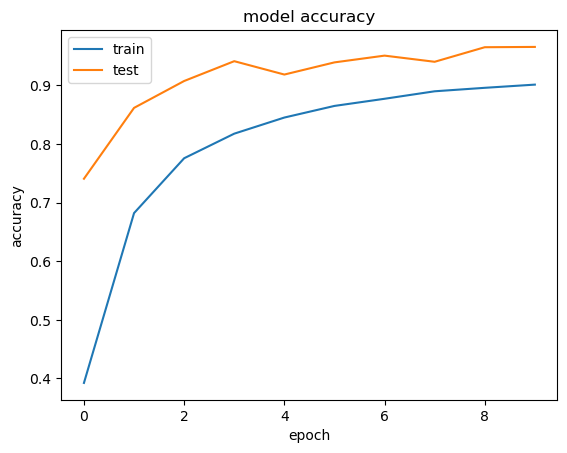

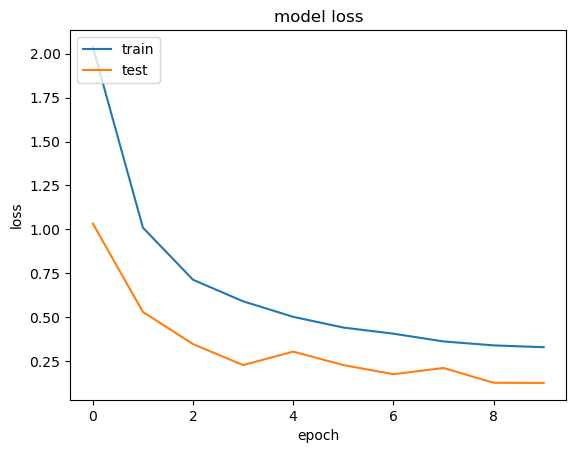

1103.6925110816956


C:\Users\Admin\AppData\Local\Temp\ipykernel_23248\3919001585.py:90: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[1360    3    0    1    0    0    0    8    0    0    0    1    7    0
     1    2    0    4    0    0    0    0    0    0    0    0]
 [   5 1178    0    9    1    0    1    1    0    0    0    0    3    0
     3    2    2    8    0    0    1    0    0    0    0    0]
 [   0    6 2018   12   11    0    5    1    0    9    0   21    1    2
    20    2    3    1    2    3    6    0    0    0    2    0]
 [   2   14   12 1366    2    0    4    1    0   12   10    0    0    1
    91    3   14    1    1    0    0    0    0    0    0    0]
 [   0   13   18    0 1445    5    6    2    0    4    4    6    0    0
     0    0    0    1    4    1    0    0    0    0    0    3]
 [   0    0    0    0    3  228    1    0    0    0    0    0    0    0
     0    9    0    0    0    2    0    0    0    0    1    0]
 [   4   32   18    1    9    1 1351    0    0    2    0    0    1    1
     4    1   27    3    2    0    0    0    1    0    0    0]
 [  19    1    0    0    0    0    0 1

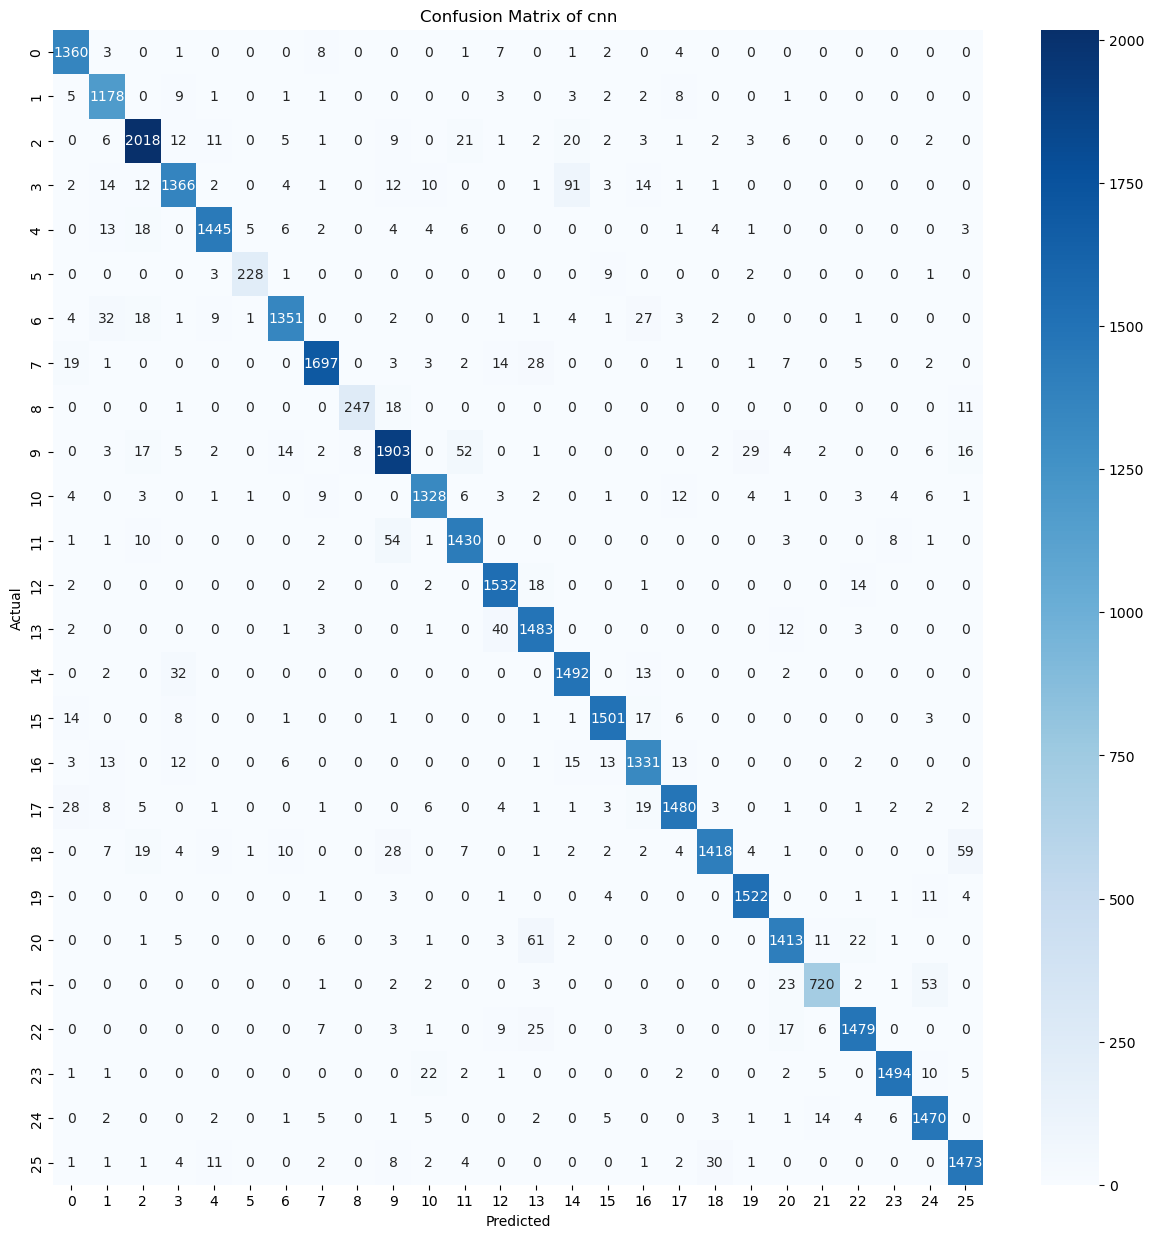

In [2]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from matplotlib import pyplot as plt
import time
import keras

start = time.time()
img_width, img_height = 71, 71

train_data_dir = r"D:\project\Emnist\mnist_images\Train"
validation_data_dir = r"D:\project\Emnist\mnist_images\Test"
nb_train_samples = 24562
nb_validation_samples = 3966
epochs = 10
batch_size = 64

input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Use specific preprocessing function
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical', shuffle=False)

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs, validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)

model.save_weights('model_saved1.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()

end = time.time()
print(end - start)


from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Confusion Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get class names from generator
class_names = list(validation_generator.class_indices.keys())

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred, labels=np.arange(len(class_names))))

print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=class_names))



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of cnn')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_cnn.png')

# Show the plot
plt.show()